In [4]:
## PROJECT START!!! Random forest classifier to predict House pricings

In [5]:
!pip install seaborn

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [7]:
#collumns to drop = date, 

In [8]:
house_data = pd.read_csv('king_ country_ houses_aa.csv')


In [25]:
house_data.shape

(21613, 25)

In [26]:
house_data.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
age                0
renovated_flag     0
bath_per_bed      13
living_ratio       0
dtype: int64

In [27]:
house_data.fillna(method='ffill', inplace=True)

C:\Users\vigus\AppData\Local\Temp\ipykernel_17916\2155536620.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_data.fillna(method='ffill', inplace=True)


In [28]:
house_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
age               0
renovated_flag    0
bath_per_bed      0
living_ratio      0
dtype: int64

In [9]:
print(house_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [10]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
print(house_data.describe())

                 id                           date         price  \
count  2.161300e+04                          21613  2.161300e+04   
mean   4.580302e+09  2014-10-29 04:38:01.959931648  5.400881e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.500000e+04   
25%    2.123049e+09            2014-07-22 00:00:00  3.219500e+05   
50%    3.904930e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.308900e+09            2015-02-17 00:00:00  6.450000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876566e+09                            NaN  3.671272e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.00

In [30]:
house_data.head(12)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated_flag,bath_per_bed,living_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,60,0,0.333333,0.208850
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,64,1,0.750000,0.354874
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,82,0,0.500000,0.077000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,50,0,0.750000,0.392000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,28,0,0.666667,0.207921
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,0,98053,47.6561,-122.005,4760,101930,14,0,1.125000,0.053174
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,98003,47.3097,-122.327,2238,6819,20,0,0.750000,0.251503
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,98198,47.4095,-122.315,1650,9711,52,0,0.500000,0.109155
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,0,98146,47.5123,-122.337,1780,8113,55,0,0.333333,0.238286
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,98038,47.3684,-122.031,2390,7570,12,0,0.833333,0.288110


In [12]:
# Convert the 'date' column to datetime format
house_data['date'] = pd.to_datetime(house_data['date'], errors='coerce')

house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
#Drop or transform lot features
house_data["log_lot"] = np.log1p(house_data["sqft_lot"])
house_data["log_lot15"] = np.log1p(house_data["sqft_lot15"])

In [33]:
#Convert yr_renovated to binary
house_data["renovated"] = (house_data["yr_renovated"] > 0).astype(int)
house_data.drop("yr_renovated", axis=1, inplace=True)

In [ ]:
#Remove noisy engineered features


In [14]:
# House age
house_data["age"] = 2015 - house_data["yr_built"]

# Renovated flag
house_data["renovated_flag"] = (house_data["yr_renovated"] > 0).astype(int)

In [15]:
# Bath per bedroom (avoid division by zero)
house_data["bath_per_bed"] = (
    house_data["bathrooms"] /
    house_data["bedrooms"].replace(0, np.nan))

house_data["living_ratio"] = (
    house_data["sqft_living"] /
    house_data["sqft_lot"].replace(0, np.nan))


In [16]:
# Drop columns i don't want 
cols_to_drop = ["id", "date", "sqft_lot", "sqft_lot15"]
cols_to_drop = [c for c in cols_to_drop if c in house_data.columns]
house_data_cleaned = house_data.drop(columns=cols_to_drop)

In [17]:
# Handle infinities and NaNs
house_data_cleaned = house_data_cleaned.replace([np.inf, -np.inf], np.nan)

# Fill numeric NaNs with median of each column
house_data_cleaned = house_data_cleaned.fillna(house_data_cleaned.median(numeric_only=True))


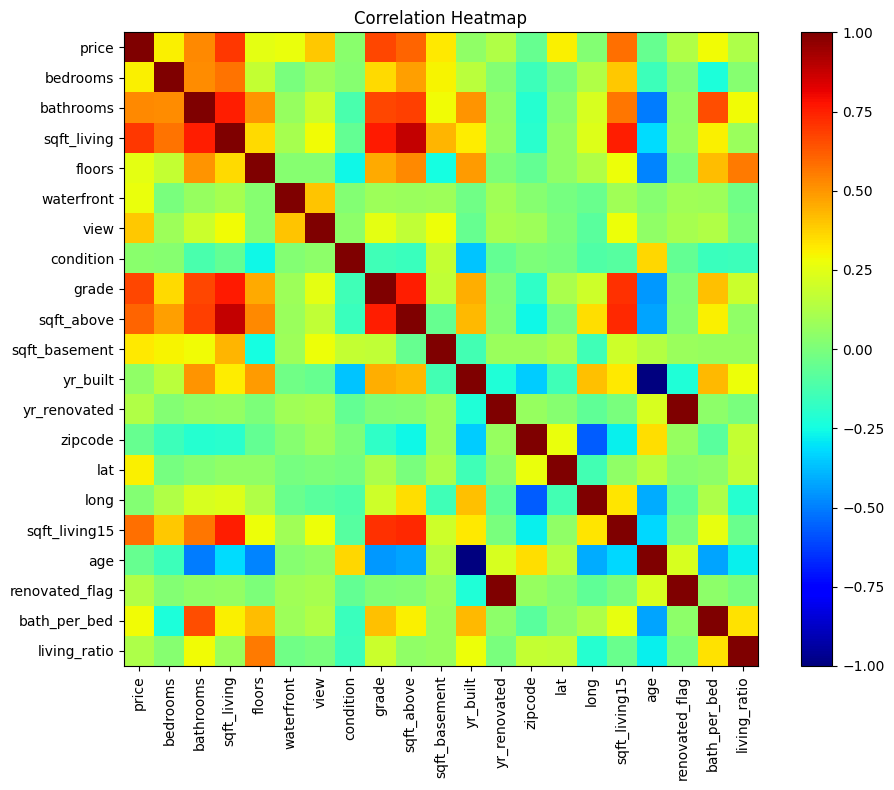

In [18]:
#Correlation heatmap
correlation = house_data_cleaned.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
#Define target and features
y = y = np.log1p(house_data_cleaned["price"]) 
X = house_data_cleaned.drop(columns=["price"])

print("Final feature columns:", X.columns)
print("Number of features:", X.shape[1])

Final feature columns: Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'age',
       'renovated_flag', 'bath_per_bed', 'living_ratio'],
      dtype='object')
Number of features: 20


In [20]:
#Encode zipcode
if "zipcode" in X.columns:
    X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# RandomForestRegressors
model = RandomForestRegressor(
    n_estimators=600,
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=6,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== RandomForestRegressor Performance ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== RandomForestRegressor Performance ===
MSE : 23617462240.35181
RMSE: 153679.7391992575
R²  : 0.8437757913386514


In [24]:
# Feature importance
feature_importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))


Top 20 Most Important Features:
sqft_living      0.156015
grade            0.142947
lat              0.108705
sqft_above       0.089881
sqft_living15    0.083448
bathrooms        0.068581
view             0.043444
long             0.034223
sqft_basement    0.031776
bath_per_bed     0.024076
yr_built         0.024024
age              0.023924
zipcode_98004    0.023855
living_ratio     0.022460
waterfront       0.020790
bedrooms         0.018335
floors           0.012477
zipcode_98039    0.010217
zipcode_98112    0.007385
zipcode_98040    0.006953
dtype: float64
